## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Import Libraries & Load Data </span></b>

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
#file loading
df = pd.read_csv('Salaries.csv')

In [3]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [4]:
df.shape

(148654, 13)

In [5]:
table= pd.DataFrame({'unique':df.nunique(),
                   'Null':df.isnull().sum(),
                   'Nullpercent':df.isnull().sum()/len(df)*100,
                   'type':df.dtypes})

In [6]:
table

,unique,Null,Nullpercent,type
Id,148654,0,0.000000,int64
EmployeeName,110811,0,0.000000,object
JobTitle,2159,0,0.000000,object
BasePay,109900,605,0.406985,object
OvertimePay,66555,0,0.000000,object
OtherPay,84968,0,0.000000,object
Benefits,99635,36159,24.324270,object
TotalPay,138486,0,0.000000,float64
TotalPayBenefits,142098,0,0.000000,float64
Year,4,0,0.000000,int64


In [7]:
df=df.drop(columns=['Id','Notes'], axis=1)

In [8]:
df[df.duplicated()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco,NaN
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco,NaN
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco,NaN


In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(148651, 11)

In [11]:
df[df['BasePay']==0.0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
2896,JOHN PAYNE,MANAGER VII,0.0,0.0,142245.22,NaN,142245.22,142245.22,2011,San Francisco,NaN
3263,LAWRENCE BADINER,MANAGER VI,0.0,0.0,138191.99,NaN,138191.99,138191.99,2011,San Francisco,NaN
19058,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.2,64356.03,NaN,65986.23,65986.23,2011,San Francisco,NaN
20834,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,52820.77,NaN,60636.55,60636.55,2011,San Francisco,NaN
21658,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0.0,58441.6,NaN,58441.60,58441.60,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...
72923,Cherise Wong,Special Nurse,0.0,0.0,3.28,0.88,3.28,4.16,2012,San Francisco,NaN
72924,Donald Clark,Transit Operator,0.0,0.0,1.77,0.14,1.77,1.91,2012,San Francisco,NaN
122361,Michael V Rolovich,"Captain, Fire Suppression",0.0,0.0,130320.75,0.0,130320.75,130320.75,2014,San Francisco,PT
127449,Kenneth V Sanchez,Police Officer 3,0.0,0.0,108294.36,0.0,108294.36,108294.36,2014,San Francisco,PT


In [12]:
df[df['TotalPay']==0.0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
36156,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco,NaN
36157,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco,NaN
36158,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,NaN,0.0,0.00,2011,San Francisco,NaN
70877,Roland Baylon,Deputy Court Clerk II,0.0,0.0,0.0,3728.05,0.0,3728.05,2012,San Francisco,NaN
70927,Felecia Phillips,Registered Nurse,0.0,0.0,0.0,3618.13,0.0,3618.13,2012,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.0,0.00,2014,San Francisco,PT
148646,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.00,2014,San Francisco,NaN
148647,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.0,0.00,2014,San Francisco,PT
148648,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.0,0.00,2014,San Francisco,PT


In [13]:
df=df.drop(index=148646) #dropped the index as it has a value 'Not provided'

In [14]:
#df.to_csv('SF_Sals.csv')

In [15]:
df_1=df.groupby(by='Year').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [16]:
df_1 # YEARWISISE DATA COUNTS

,Year,counts
3,2014,38119
2,2013,37606
1,2012,36766
0,2011,36159


In [17]:
df['TotalPay'].mean()

74770.33390098579

Highest Total Pay Record

In [18]:
df['TotalPay'].max()

567595.43

In [19]:
df[df['TotalPay']==567595.43]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN


Avg_Mean_Total_Pay by year

In [20]:
df_1=df.groupby(by='Year')['TotalPay'].mean().reset_index(name='Avg_Total_Pay').sort_values(by='Avg_Total_Pay', ascending=False)

In [21]:
df_1

,Year,Avg_Total_Pay
2,2013,77611.443142
3,2014,75471.836912
1,2012,74113.262265
0,2011,71744.103871


In [22]:
df_1['Avg_Total_Pay']=df_1['Avg_Total_Pay'].round(2)

In [23]:
df_1

,Year,Avg_Total_Pay
2,2013,77611.44
3,2014,75471.84
1,2012,74113.26
0,2011,71744.10


In [24]:
df['JobTitle']=df['JobTitle'].str.upper()

In [25]:
df['JobTitle']

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148645                         HUMAN SERVICES TECHNICIAN
148647                       COMMUNICATIONS DISPATCHER 2
148648                                         CUSTODIAN
148649                                         CUSTODIAN
148653                        COUNSELOR, LOG CABIN RANCH
Name: JobTitle, Length: 148650, dtype: object

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> How many employees have manager in title </span></b>

In [26]:
def manager(title):
    if 'MANAGER' in title:
        return 'True'
    else: return 'false'

In [27]:
df['Manager(Y/N)']=df['JobTitle'].apply(manager)

In [28]:
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Manager(Y/N)
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN,True
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN,false
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN,false
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,NaN,false
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN,false
...,...,...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,HUMAN SERVICES TECHNICIAN,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT,false
148647,Joann Anderson,COMMUNICATIONS DISPATCHER 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT,false
148648,Leon Walker,CUSTODIAN,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT,false
148649,Roy I Tillery,CUSTODIAN,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT,false


In [29]:
df['Manager(Y/N)'].value_counts()

false    144540
True       4110
Name: Manager(Y/N), dtype: int64

<AxesSubplot:xlabel='TotalPay', ylabel='Density'>

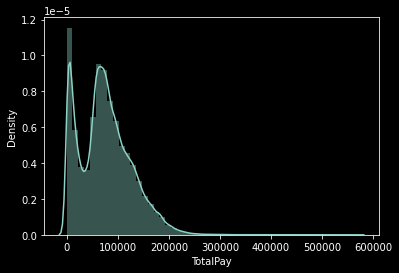

In [30]:
sns.distplot(df['TotalPay'])

<AxesSubplot:xlabel='BasePay', ylabel='Density'>

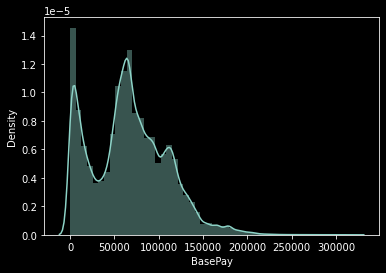

In [31]:
sns.distplot(df['BasePay'])

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> END </span></b>